# 📊 EDA: Stats & Plots
Descriptive Statistics and Visualizations for a Single Column of Data


0. **Upload Data**
1. **Select Column**
2. **Basic Data Summary**
3. **Distribution**
4. **Skewness & Kurtosis**

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 0. Upload Data

In [66]:
data = pd.read_csv("./data/titanic.csv")

## 1. SELECT the Column

In [67]:
# Check the columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
# Enter the column number
col = data[data.columns[5]]
col_name = data.columns[5]

## 2. Basic Data Summary

In [69]:
# Basic info
col.info

<bound method Series.info of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [70]:
# Count the missing values
col.isnull().sum()

177

In [71]:
# Statical info
col.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 3. Distribution
### 3-1. for Continuous Column

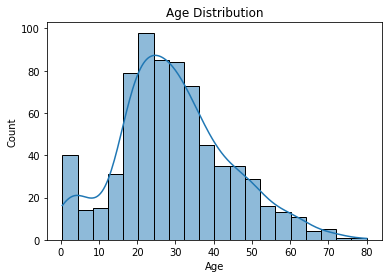

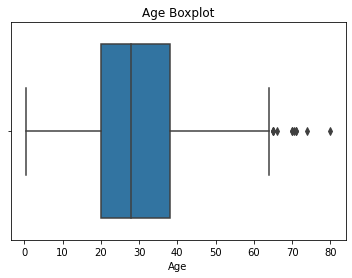

In [72]:
# histogram
sns.histplot(col, kde=True) 
# KDE (Kernel Density Estimation): a smoothed version of the histogram
plt.title(f'{col_name} Distribution')
plt.show()

#boxplot
sns.boxplot(x=col)
plt.title(f'{col_name} Boxplot')
plt.show()

### 3-2. for Categorical Column

In [73]:
# Count the unique category values
col_counts= col.value_counts()
col_counts

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

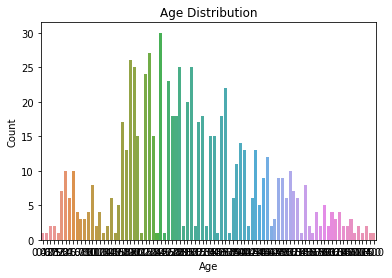

In [74]:
#Bar plot
sns.barplot(x=col_counts.index, y=col_counts.values)
plt.title(f'{col_name} Distribution')
plt.xlabel(f'{col_name}')
plt.ylabel('Count')
plt.show()

In [75]:
col_ratio = col.value_counts(normalize=True)
col_ratio

Age
24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: proportion, Length: 88, dtype: float64

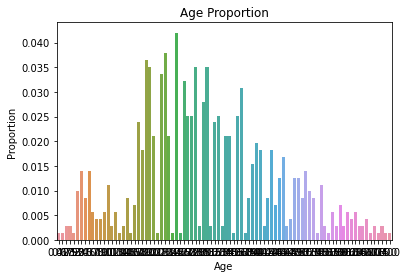

In [76]:
#Bar plot
sns.barplot(x=col_ratio.index, y=col_ratio.values)
plt.title(f'{col_name} Proportion')
plt.xlabel(f'{col_name}')
plt.ylabel('Proportion')
plt.show()

## 4. Skewness & Kurtosis
### Only for Continuous Column

In [77]:
# Skewness: asymmetry of the distribution
# Kurtosis: heaviness of the tails and sharpness of the peak

col_clean = col.dropna()

print(f'{col_name} - Skewness: {stats.skew(col_clean)}, Kurtosis: {stats.kurtosis(col_clean)}')

Age - Skewness: 0.3882898514698657, Kurtosis: 0.16863657224286044
